#Import The Necessary Libraries

In [ ]:
!pip install numpy pandas scikit-learn seaborn matplotlib xgboost imblearn shap #Install the needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Explainability
import shap

In [ ]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

#Load Original Dataset in Excel format and Covert it into CSV using Python Script



In [ ]:
def convert_excel_to_csv(excel_file_path, csv_file_path):
    """
    Converts an Excel file (first sheet) to a CSV file.

    Args:
        excel_file_path (str): The path to the input Excel file.
        csv_file_path (str): The path where the output CSV file will be saved.
    """
    try:
        # Read the Excel file into a pandas DataFrame
        # By default, read_excel reads the first sheet
        df = pd.read_excel(excel_file_path)

        # Save the DataFrame to a CSV file
        # index=False prevents pandas from writing the DataFrame index as a column
        df.to_csv(csv_file_path, index=False)

        print(f"Successfully converted '{excel_file_path}' to '{csv_file_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")

excel_input_path = 'loan_dataset.xlsx'
csv_output_path = 'loan_dataset.csv'

convert_excel_to_csv(excel_input_path, csv_output_path)

Successfully converted 'loan_dataset.xlsx' to 'loan_dataset.csv'


#Explore Data

In [ ]:
# Load the dataset as pandas DataFrame
df = pd.read_csv('loan_dataset.csv')

In [ ]:
df.sample(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
9794,2028-01-31,42,141760,614,Employed,High School,22,28655,48,Widowed,3,Other,338,10.945,4,2,0,Debt Consolidation,0,27,9,3187,389,67666,33160,8.179,6,34506,21.665,1.958,865.6,10.189,1,39.2
7980,2031-04-08,46,87359,557,Employed,Bachelor,24,43171,36,Married,1,Own,429,5.496,2,3,0,Debt Consolidation,0,25,1,2303,465,54951,4582,7.973,6,50369,249.671,26.568,1752.4,2.996,0,54.0
16026,2040-08-14,60,62637,640,Employed,High School,41,16661,24,Widowed,0,Rent,435,3.599,2,1,0,Education,0,30,8,3456,2498,18919,11699,799.665,3,7220,171.661,1.626,817.9,2.400,0,52.0
11292,2046-04-13,52,189352,596,Employed,Associate,30,23275,48,Divorced,0,Mortgage,331,3.828,6,1,0,Education,0,32,2,923,156,99035,75139,7.834,0,23896,220.275,22.649,741.5,6.797,1,48.0
8831,2065-03-20,35,15000,620,Employed,Master,12,48307,72,Married,0,Mortgage,322,32.369,4,0,0,Home,0,24,6,1472,836,73360,30600,813.886,5,42760,253.307,24.635,129.0,12.899,0,51.0
13899,2067-02-09,57,55170,487,Employed,Bachelor,32,41952,48,Married,3,Rent,621,23.035,0,0,0,Auto,0,29,3,2059,1880,47709,110948,9.152,2,10340,293.452,32.290,1566.9,4.758,0,56.0
16035,2037-08-31,48,60535,609,Employed,High School,27,25019,60,Single,0,Mortgage,1033,32.307,0,2,0,Home,0,27,28,3427,724,43100,115520,7.556,5,7204,22.551,23.694,715.3,34.657,0,49.0
4282,2070-12-04,43,31537,560,Employed,High School,20,27214,24,Married,3,Mortgage,876,7.883,3,1,0,Home,1,26,3,1676,3760,105403,3774,6.576,10,101629,22.221,2.054,1392.3,863.107,0,62.0
4725,2059-06-22,41,86278,534,Employed,High School,16,19990,60,Single,0,Rent,333,40.886,3,1,0,Home,0,27,10,6647,5011,102397,8809,9.640,2,93588,25.799,2.525,589.6,1.283,1,41.6
17751,2047-08-10,42,24245,585,Self-Employed,Doctorate,19,12446,96,Single,1,Rent,137,3.652,7,1,0,Other,0,30,15,473,1234,36963,32457,7.368,5,4506,254.946,24.910,3001.1,2.163,0,57.0


In [ ]:
df.shape #total records, total features

(20000, 34)

In [ ]:
df.dtypes #Data Types

,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


In [ ]:
#For Statistical Summary
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,37.827608,3.023350,0.993000,0.052400,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,88.766843,5.002650,7.229432e+04,157.511247,24.671040,5213.071055,41.217580,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,110.430622,1.736161,0.986965,0.222838,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,241.835225,2.236804,1.179200e+05,110.399760,46.930934,15850.714645,128.100662,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,1.001000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,2.700000,0.000000,1.000000e+03,1.694000,1.252000,100.000000,1.000000,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,4.106000,2.000000,0.000000,0.000000,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,7.453000,3.000000,8.734750e+03,24.154750,2.758000,559.100000,4.663000,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,11.321500,3.000000,1.000000,0.000000,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,8.418000,5.000000,3.285550e+04,208.643500,20.493000,861.650000,10.135000,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,25.676500,4.000000,2.000000,0.000000,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,9.233000,6.000000,8.882550e+04,250.277250,24.208250,1710.325000,22.783500,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,992.538000,13.000000,7.000000,1.000000,1.000000,45.000000,29.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,995.910000,16.000000,2.603208e+06,405.029000,429.389000,99913.900000,999.291000,1.000000,84.000000


#Data Cleaning and Data Preprocessing

In [ ]:
#For Missing values checking
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [ ]:
#For duplicated values checking
df.duplicated().sum()

np.int64(0)

#Check the traget features distribution

In [ ]:
#For the Loan Approval feature
df['LoanApproved'].value_counts()

,count
LoanApproved,
0,15220
1,4780


In [ ]:
print(f"\nApproval Rate: {df['LoanApproved'].mean()*100:.2f}%")


Approval Rate: 23.90%


In [ ]:
#For the Risk Score
df['RiskScore'].describe()

,RiskScore
count,20000.000000
mean,50.766780
std,7.778262
min,28.800000
25%,46.000000
50%,52.000000
75%,56.000000
max,84.000000


In [ ]:
# Create a copy for cleaning
df_clean = df.copy()

In [ ]:
#Convert ApplicationDate feature to datetime data type
if 'ApplicationDate' in df_clean.columns:
    df_clean['ApplicationDate'] = pd.to_datetime(df_clean['ApplicationDate'], errors='coerce')

In [ ]:
#Outlier Detection and Treatment
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    return outliers, lower_bound, upper_bound


outlier_summary = []
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['LoanApproved', 'RiskScore']]
for col in numerical_cols:
    if col not in ['Age', 'Experience']:  # Keep age and experience as is
        outliers, lower, upper = detect_outliers_iqr(df_clean, col)
        if outliers > 0:
            # Cap outliers instead of removing
            df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)
            outlier_summary.append(f"   - {col}: {outliers} outliers capped")

for item in outlier_summary[:10]:  # Show first 10
    print(item)

   - AnnualIncome: 241 outliers capped
   - LoanAmount: 125 outliers capped
   - MonthlyDebtPayments: 110 outliers capped
   - CreditCardUtilizationRate: 1033 outliers capped
   - NumberOfOpenCreditLines: 6 outliers capped
   - BankruptcyHistory: 1048 outliers capped
   - PreviousLoanDefaults: 2001 outliers capped
   - SavingsAccountBalance: 643 outliers capped
   - CheckingAccountBalance: 651 outliers capped
   - TotalAssets: 586 outliers capped


##Data Validation

In [ ]:
# Ensure credit scores are in valid range
if 'CreditScore' in df_clean.columns:
    df_clean['CreditScore'] = df_clean['CreditScore'].clip(300, 850)


In [ ]:
# Ensure percentages are valid
if 'CreditCardUtilizationRate' in df_clean.columns:
    df_clean['CreditCardUtilizationRate'] = df_clean['CreditCardUtilizationRate'].clip(0, 100)

In [ ]:
df_clean.shape

(20000, 34)

#Feature Engineering

In [ ]:
# Create a copy for feature engineering
df_fe = df_clean.copy()

In [ ]:
#Created date-based features (Year, Month, DayOfWeek)
if 'ApplicationDate' in df_fe.columns:
    df_fe['ApplicationYear'] = df_fe['ApplicationDate'].dt.year
    df_fe['ApplicationMonth'] = df_fe['ApplicationDate'].dt.month
    df_fe['ApplicationDayOfWeek'] = df_fe['ApplicationDate'].dt.dayofweek

In [ ]:
#Creating Financial Ratios

# Monthly Income
df_fe['MonthlyIncome'] = df_fe['AnnualIncome'] / 12

# Debt-to-Income Ratio
df_fe['MonthlyLoanPayment'] = df_fe.get('MonthlyLoanPayment', df_fe['LoanAmount'] / df_fe['LoanDuration'])
df_fe['DTI_Ratio'] = (df_fe['MonthlyDebtPayments'] + df_fe['MonthlyLoanPayment']) / df_fe['MonthlyIncome']

In [ ]:
# Loan-to-Value Ratio
df_fe['LTV_Ratio'] = df_fe['LoanAmount'] / (df_fe['TotalAssets'] + 1)  # +1 to avoid division by zero

In [ ]:
# Liquidity Ratio
df_fe['Liquidity_Ratio'] = (df_fe['SavingsAccountBalance'] + df_fe['CheckingAccountBalance']) / (df_fe['MonthlyLoanPayment'] + 1)

In [ ]:
# Disposable Income
df_fe['DisposableIncome'] = df_fe['MonthlyIncome'] - (df_fe['MonthlyDebtPayments'] + df_fe['MonthlyLoanPayment'])

In [ ]:
# Net Worth
df_fe['NetWorth'] = df_fe['TotalAssets'] - df_fe['TotalLiabilities']

In [ ]:
# Credit Utilization Category
df_fe['HighCreditUtilization'] = (df_fe['CreditCardUtilizationRate'] > 30).astype(int)  #High Credit Utilization Flag (>30%)

In [ ]:
# Age Groups
df_fe['AgeGroup'] = pd.cut(df_fe['Age'], bins=[0, 25, 35, 50, 100],
                            labels=['Young', 'MiddleAge', 'Mature', 'Senior'])

In [ ]:
# Income-to-Loan Ratio
df_fe['IncomeToLoanRatio'] = df_fe['AnnualIncome'] / (df_fe['LoanAmount'] + 1)

In [ ]:
# Credit History Quality Score
df_fe['CreditQualityScore'] = (
    df_fe['CreditScore'] * 0.4 +
    df_fe['PaymentHistory'] * 10 +
    df_fe['LengthOfCreditHistory'] * 2 -
    df_fe['NumberOfCreditInquiries'] * 10 -
    df_fe['BankruptcyHistory'] * 100 -
    df_fe['PreviousLoanDefaults'] * 50
)

In [ ]:
# Asset Coverage Ratio
df_fe['AssetCoverageRatio'] = df_fe['TotalAssets'] / (df_fe['LoanAmount'] + 1)

In [ ]:
df_fe.shape[1]  #Total Features After Engineering

47

#Exploratory Data Analysis

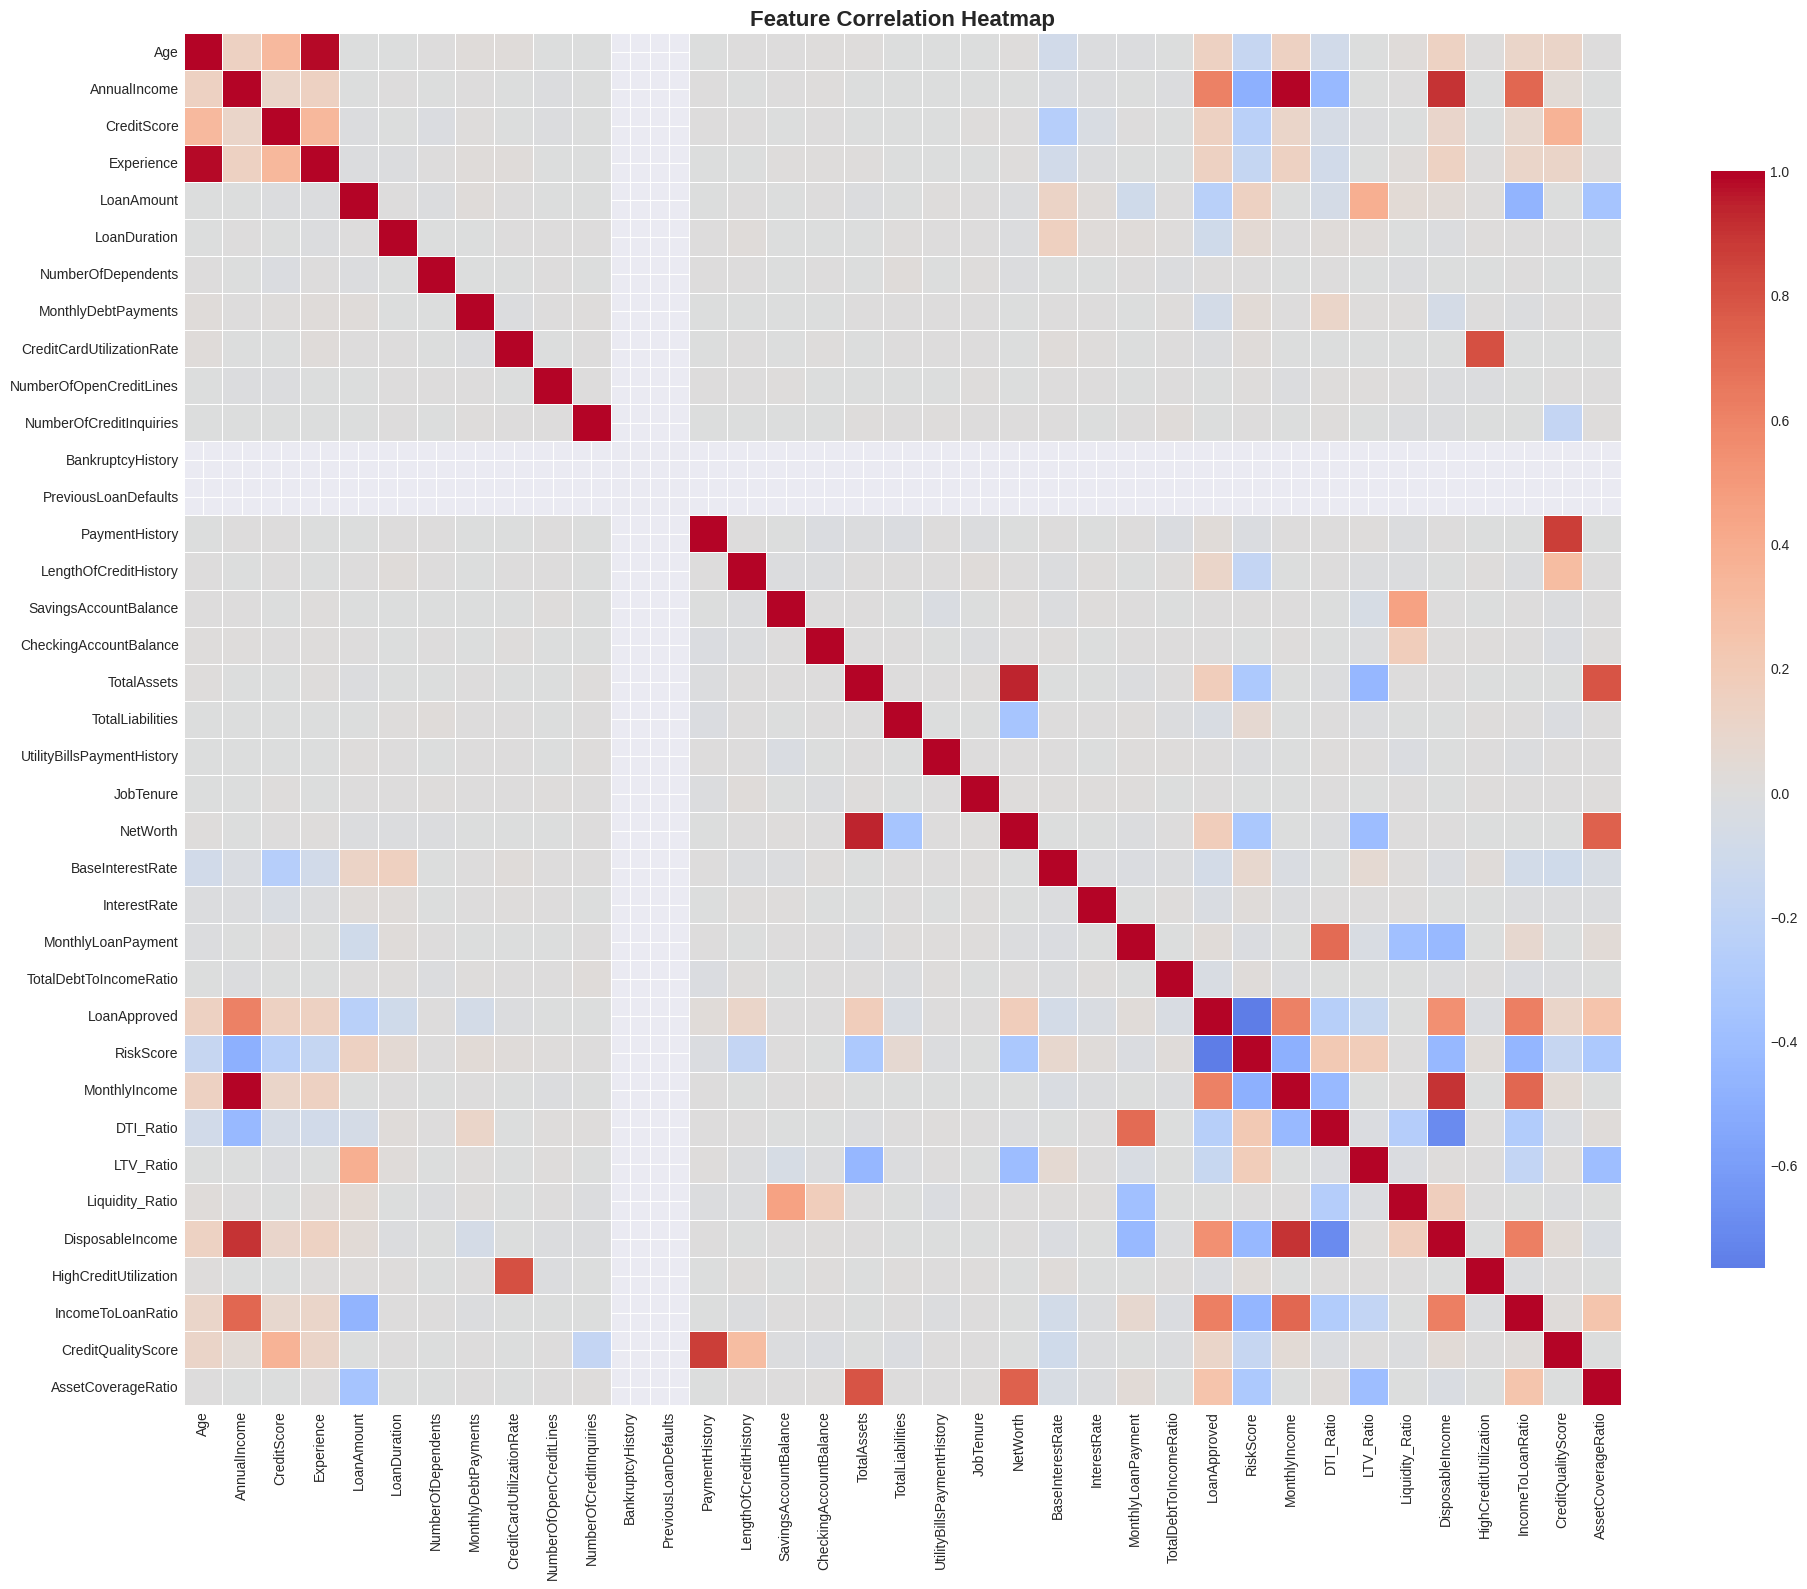

In [ ]:
#Correlation Analysis

plt.figure(figsize=(20, 16))
numerical_features = df_fe.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_fe[numerical_features].corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()   #Correlation heatmap

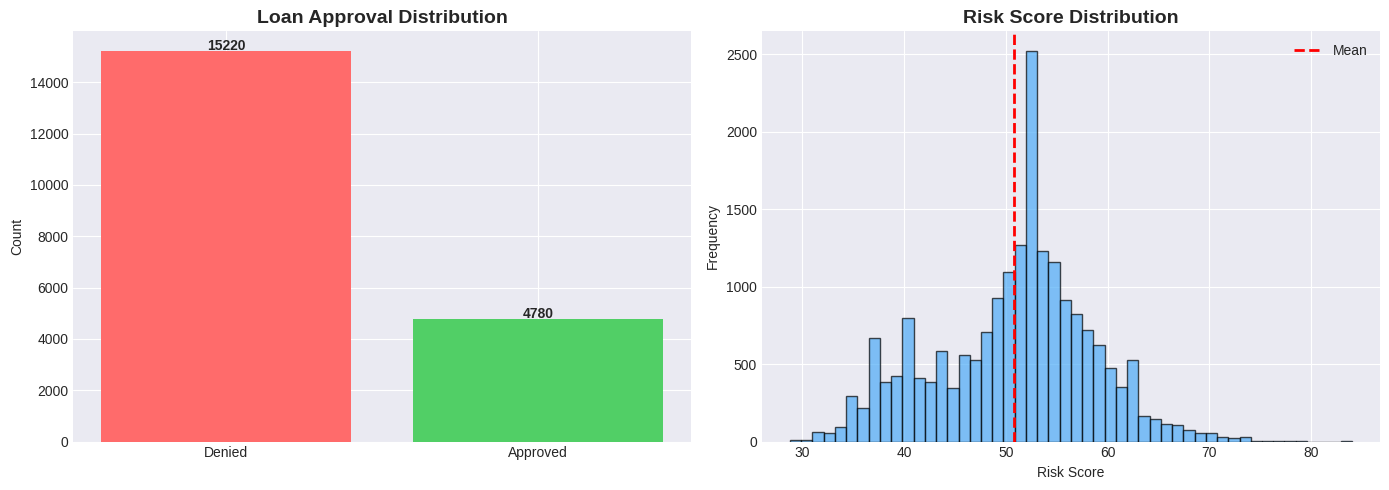

In [ ]:
#Target Variable Analysis

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


# Loan Approval Distribution
approval_counts = df_fe['LoanApproved'].value_counts()
axes[0].bar(['Denied', 'Approved'], approval_counts.values, color=['#ff6b6b', '#51cf66'])
axes[0].set_title('Loan Approval Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(approval_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')


# Risk Score Distribution
axes[1].hist(df_fe['RiskScore'], bins=50, color='#4dabf7', edgecolor='black', alpha=0.7)
axes[1].set_title('Risk Score Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Risk Score')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df_fe['RiskScore'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].legend()


plt.tight_layout()
plt.show()  #Target distribution plot

In [ ]:
#Feature Importance Preview (using correlation with targets)

# For Classification Target
loan_corr = df_fe[numerical_features].corrwith(df_fe['LoanApproved']).abs().sort_values(ascending=False)
loan_corr.head(11)[1:]  # Exclude LoanApproved itself

,0
RiskScore,0.766137
IncomeToLoanRatio,0.615331
AnnualIncome,0.612121
MonthlyIncome,0.612121
DisposableIncome,0.544077
AssetCoverageRatio,0.252733
DTI_Ratio,0.250399
LoanAmount,0.245432
NetWorth,0.176114
TotalAssets,0.173872


In [ ]:
# For Regression Target
risk_corr = df_fe[numerical_features].corrwith(df_fe['RiskScore']).abs().sort_values(ascending=False)
risk_corr.head(11)[1:]  # Exclude RiskScore itself

,0
LoanApproved,0.766137
MonthlyIncome,0.496210
AnnualIncome,0.496210
IncomeToLoanRatio,0.455284
DisposableIncome,0.441023
NetWorth,0.318696
TotalAssets,0.314483
AssetCoverageRatio,0.313058
CreditScore,0.240198
DTI_Ratio,0.213895


#Data Preprocessing and Modeling with Feature Selection and Feature Extraction

In [ ]:
#Encode categorical variables
df_model = df_fe.copy()

In [ ]:
# Drop columns not needed for modeling
cols_to_drop = ['ApplicationDate']
df_model = df_model.drop([col for col in cols_to_drop if col in df_model.columns], axis=1)

In [ ]:
# Identify categorical columns
categorical_features = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
# One-Hot Encoding for Numerical Conversion
df_encoded = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)
df_encoded.shape[1]

59

In [ ]:
#Separate features and targets
X = df_encoded.drop(['LoanApproved', 'RiskScore'], axis=1)
y_classification = df_encoded['LoanApproved']
y_regression = df_encoded['RiskScore']

In [ ]:
print(f"\n2. Feature Matrix Shape: {X.shape}")
print(f"   - Classification Target Shape: {y_classification.shape}")
print(f"   - Regression Target Shape: {y_regression.shape}")


2. Feature Matrix Shape: (20000, 57)
   - Classification Target Shape: (20000,)
   - Regression Target Shape: (20000,)


In [ ]:
#Check for target class imbalance
print("\n3. Class Imbalance Check:")
class_dist = y_classification.value_counts()
print(f"   - Class 0 (Denied): {class_dist[0]} ({class_dist[0]/len(y_classification)*100:.2f}%)")
print(f"   - Class 1 (Approved): {class_dist[1]} ({class_dist[1]/len(y_classification)*100:.2f}%)")
imbalance_ratio = class_dist[0] / class_dist[1]
print(f"   - Imbalance Ratio: {imbalance_ratio:.2f}:1")


3. Class Imbalance Check:
   - Class 0 (Denied): 15220 (76.10%)
   - Class 1 (Approved): 4780 (23.90%)
   - Imbalance Ratio: 3.18:1


In [ ]:
y_regression.value_counts()

,count
RiskScore,
52.0,1267
51.0,1254
53.0,1248
54.0,1224
55.0,1155
50.0,1081
56.0,912
49.0,865
57.0,826


#Split into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

# Split for Classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"\nClassification Split:")
print(f"   - Training Set: {X_train_clf.shape[0]} samples")
print(f"   - Test Set: {X_test_clf.shape[0]} samples")


Classification Split:
   - Training Set: 16000 samples
   - Test Set: 4000 samples


In [ ]:
# Split for Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

print(f"\nRegression Split:")
print(f"   - Training Set: {X_train_reg.shape[0]} samples")
print(f"   - Test Set: {X_test_reg.shape[0]} samples")


Regression Split:
   - Training Set: 16000 samples
   - Test Set: 4000 samples


#Feature Scaling for increase the model training speed

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
scaler_clf = StandardScaler()
scaler_reg = StandardScaler()

# Fit and transform for classification
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Fit and transform for regression
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [ ]:
# Convert back to DataFrame for feature names
X_train_clf_scaled = pd.DataFrame(X_train_clf_scaled, columns=X_train_clf.columns)
X_test_clf_scaled = pd.DataFrame(X_test_clf_scaled, columns=X_test_clf.columns)
X_train_reg_scaled = pd.DataFrame(X_train_reg_scaled, columns=X_train_reg.columns)
X_test_reg_scaled = pd.DataFrame(X_test_reg_scaled, columns=X_test_reg.columns)

#Handle Imbalanced Data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

if imbalance_ratio > 1.5:
    print(f"Class imbalance detected (ratio: {imbalance_ratio:.2f}:1)")
    print("Applying SMOTE (Synthetic Minority Over-sampling Technique)...")

    smote = SMOTE(random_state=42, k_neighbors=5)
    X_train_clf_balanced, y_train_clf_balanced = smote.fit_resample(X_train_clf_scaled, y_train_clf)

    print(f"\nBefore SMOTE:")
    print(f"   - Class 0: {(y_train_clf == 0).sum()}")
    print(f"   - Class 1: {(y_train_clf == 1).sum()}")

    print(f"\nAfter SMOTE:")
    print(f"   - Class 0: {(y_train_clf_balanced == 0).sum()}")
    print(f"   - Class 1: {(y_train_clf_balanced == 1).sum()}")

    # Use balanced data for training
    X_train_clf_final = X_train_clf_balanced
    y_train_clf_final = y_train_clf_balanced
else:
    print("Classes are relatively balanced. SMOTE not needed.")
    X_train_clf_final = X_train_clf_scaled
    y_train_clf_final = y_train_clf

Class imbalance detected (ratio: 3.18:1)
Applying SMOTE (Synthetic Minority Over-sampling Technique)...

Before SMOTE:
   - Class 0: 12176
   - Class 1: 3824

After SMOTE:
   - Class 0: 12176
   - Class 1: 12176


#Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# For Classification - using mutual information
selector_clf = SelectKBest(score_func=mutual_info_classif, k='all')
selector_clf.fit(X_train_clf_final, y_train_clf_final)

feature_scores_clf = pd.DataFrame({
    'Feature': X_train_clf_final.columns,
    'Score': selector_clf.scores_
}).sort_values('Score', ascending=False)

feature_scores_clf.head(15)

,Feature,Score
35,IncomeToLoanRatio,0.343673
26,ApplicationYear,0.309869
14,LengthOfCreditHistory,0.308026
2,CreditScore,0.306543
3,Experience,0.303405
0,Age,0.299456
13,PaymentHistory,0.287178
29,MonthlyIncome,0.280881
1,AnnualIncome,0.280867
27,ApplicationMonth,0.277141


In [ ]:
# Select top 30 features for classification
top_features_clf = feature_scores_clf.head(30)['Feature'].tolist()
X_train_clf_selected = X_train_clf_final[top_features_clf]
X_test_clf_selected = X_test_clf_scaled[top_features_clf]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# For Regression
print("\n2. Feature Selection for Regression:")
selector_reg = SelectKBest(score_func=f_regression, k='all')
selector_reg.fit(X_train_reg_scaled, y_train_reg)

feature_scores_reg = pd.DataFrame({
    'Feature': X_train_reg_scaled.columns,
    'Score': selector_reg.scores_
}).sort_values('Score', ascending=False)

print(feature_scores_reg.head(15))


2. Feature Selection for Regression:
                  Feature        Score
29          MonthlyIncome  5169.305744
1            AnnualIncome  5169.305744
35      IncomeToLoanRatio  4206.371902
33       DisposableIncome  3837.169028
21               NetWorth  1774.913281
17            TotalAssets  1717.877720
37     AssetCoverageRatio  1683.916234
2             CreditScore   932.872145
30              DTI_Ratio   759.405982
31              LTV_Ratio   582.552846
14  LengthOfCreditHistory   516.660150
3              Experience   441.395006
0                     Age   430.064870
36     CreditQualityScore   358.060950
4              LoanAmount   347.467022


In [ ]:
# Select top 30 features for regression
top_features_reg = feature_scores_reg.head(30)['Feature'].tolist()
X_train_reg_selected = X_train_reg_scaled[top_features_reg]
X_test_reg_selected = X_test_reg_scaled[top_features_reg]

In [ ]:
len(top_features_clf)

30

In [ ]:
len(top_features_reg)

30

#Model Training - Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define models to test
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss')
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Store results
clf_results = {}

##Training and Evaluating Classification Models

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve,
                             mean_squared_error, mean_absolute_error, r2_score)
from sklearn.model_selection import cross_val_score


for name, model in classification_models.items():

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_clf_selected, y_train_clf_final,
                                 cv=cv, scoring='f1', n_jobs=-1)

    # Train on full training set
    model.fit(X_train_clf_selected, y_train_clf_final)

    # Predictions
    y_pred = model.predict(X_test_clf_selected)
    y_pred_proba = model.predict_proba(X_test_clf_selected)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test_clf, y_pred)
    precision = precision_score(y_test_clf, y_pred)
    recall = recall_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred)
    roc_auc = roc_auc_score(y_test_clf, y_pred_proba)

    clf_results[name] = {
        'model': model,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"    Model: {model}")
    print(f"    CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"    Test Accuracy: {accuracy:.4f}")
    print(f"    Test Precision: {precision:.4f}")
    print(f"    Test Recall: {recall:.4f}")
    print(f"    Test F1-Score: {f1:.4f}")
    print(f"    Test ROC-AUC: {roc_auc:.4f}")
    print("\n\n")

    Model: LogisticRegression(max_iter=1000, random_state=42)
    CV F1-Score: 0.8987 (+/- 0.0030)
    Test Accuracy: 0.8832
    Test Precision: 0.7053
    Test Recall: 0.8787
    Test F1-Score: 0.7825
    Test ROC-AUC: 0.9586



    Model: RandomForestClassifier(random_state=42)
    CV F1-Score: 0.9389 (+/- 0.0040)
    Test Accuracy: 0.8970
    Test Precision: 0.7693
    Test Recall: 0.8128
    Test F1-Score: 0.7904
    Test ROC-AUC: 0.9592



    Model: GradientBoostingClassifier(random_state=42)
    CV F1-Score: 0.9369 (+/- 0.0036)
    Test Accuracy: 0.9103
    Test Precision: 0.7840
    Test Recall: 0.8619
    Test F1-Score: 0.8211
    Test ROC-AUC: 0.9682



    Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None

##Compare models with all accuracy scores

In [ ]:
comparison_df = pd.DataFrame({
    'Model': list(clf_results.keys()),
    'CV_F1': [clf_results[m]['cv_mean'] for m in clf_results.keys()],
    'Accuracy': [clf_results[m]['accuracy'] for m in clf_results.keys()],
    'Precision': [clf_results[m]['precision'] for m in clf_results.keys()],
    'Recall': [clf_results[m]['recall'] for m in clf_results.keys()],
    'F1-Score': [clf_results[m]['f1_score'] for m in clf_results.keys()],
    'ROC-AUC': [clf_results[m]['roc_auc'] for m in clf_results.keys()]
})

print(comparison_df.to_string(index=False))

              Model    CV_F1  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression 0.898702   0.88325   0.705290 0.878661  0.782487 0.958596
      Random Forest 0.938920   0.89700   0.769307 0.812762  0.790437 0.959151
  Gradient Boosting 0.936944   0.91025   0.784015 0.861925  0.821126 0.968202
            XGBoost 0.951660   0.92175   0.843850 0.825314  0.834479 0.972575


In [ ]:
# Select best model based on Precision
best_clf_name = max(clf_results.keys(), key=lambda x: clf_results[x]['precision'])
best_clf_model = clf_results[best_clf_name]['model']
best_clf_name

'XGBoost'

In [ ]:
clf_results[best_clf_name]['precision']

0.8438502673796792

##Hyper Parameter Tuning for the best classification model

In [ ]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
base_model = XGBClassifier(random_state=42, eval_metric='logloss')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Tuning XGBoost with GridSearchCV

grid_search_clf = RandomizedSearchCV(
    base_model, param_grid,
    n_jobs=-1, verbose=0
)

grid_search_clf.fit(X_train_clf_selected, y_train_clf_final)
print(f"\n✓ Best Parameters: {grid_search_clf.best_params_}")


✓ Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [ ]:
# Final model with best parameters
final_clf_model = grid_search_clf.best_estimator_

In [ ]:
# Final evaluation
y_pred_final_clf = final_clf_model.predict(X_test_clf_selected)
y_pred_proba_final_clf = final_clf_model.predict_proba(X_test_clf_selected)[:, 1]

In [ ]:
#Base vs. Tuned Model Performance
xgb_comparison = comparison_df_full[comparison_df_full['Model'].isin(['XGBoost', 'XGBoost (Tuned)'])]
print(xgb_comparison.round(4).to_string(index=False))

          Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
        XGBoost    0.9218     0.8439  0.8253    0.8345   0.9726
XGBoost (Tuned)    0.9252     0.8462  0.8400    0.8430   0.9746


In [ ]:
#Save the classification model as pickle file
import pickle

with open('final_clf_model.pkl','wb') as model:
    pickle.dump(final_clf_model,model)

#Model Training - Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define regression models to train
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100)
}

In [ ]:
# Cross-validation setup
from sklearn.model_selection import KFold
cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Store results
reg_results = {}

##Training and Evaluating Regression Models

In [ ]:
for name, model in regression_models.items():

    # Cross-validation scores (negative MSE)
    cv_scores = cross_val_score(model, X_train_reg_selected, y_train_reg,
                                 cv=cv_reg, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_rmse = np.sqrt(-cv_scores)

    # Train on full training set
    model.fit(X_train_reg_selected, y_train_reg)

    # Predictions
    y_pred_reg = model.predict(X_test_reg_selected)

    # Calculate metrics
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    reg_results[name] = {
        'model': model,
        'cv_rmse_mean': cv_rmse.mean(),
        'cv_rmse_std': cv_rmse.std(),
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2_score': r2,
        'predictions': y_pred_reg
    }

    print(f"    Model: {model}")
    print(f"    CV RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")
    print(f"    Test RMSE: {rmse:.4f}")
    print(f"    Test MAE: {mae:.4f}")
    print(f"    Test R² Score: {r2:.4f}")
    print("\n\n")

    Model: LinearRegression()
    CV RMSE: 5.6734 (+/- 0.0550)
    Test RMSE: 5.6103
    Test MAE: 4.2790
    Test R² Score: 0.4826



    Model: Ridge(random_state=42)
    CV RMSE: 5.6733 (+/- 0.0550)
    Test RMSE: 5.6103
    Test MAE: 4.2790
    Test R² Score: 0.4826



    Model: Lasso(random_state=42)
    CV RMSE: 6.1823 (+/- 0.0942)
    Test RMSE: 6.1549
    Test MAE: 4.6991
    Test R² Score: 0.3773



    Model: RandomForestRegressor(random_state=42)
    CV RMSE: 5.4649 (+/- 0.0898)
    Test RMSE: 5.4460
    Test MAE: 4.1191
    Test R² Score: 0.5125



    Model: GradientBoostingRegressor(random_state=42)
    CV RMSE: 5.3273 (+/- 0.0786)
    Test RMSE: 5.2952
    Test MAE: 3.9999
    Test R² Score: 0.5391



    Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_

##Compare Regression Models

In [ ]:
comparison_df_reg = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'CV_RMSE': [reg_results[m]['cv_rmse_mean'] for m in reg_results.keys()],
    'RMSE': [reg_results[m]['rmse'] for m in reg_results.keys()],
    'MAE': [reg_results[m]['mae'] for m in reg_results.keys()],
    'R²': [reg_results[m]['r2_score'] for m in reg_results.keys()]
})

print(comparison_df_reg.round(4).to_string(index=False))

            Model  CV_RMSE   RMSE    MAE     R²
Linear Regression   5.6734 5.6103 4.2790 0.4826
 Ridge Regression   5.6733 5.6103 4.2790 0.4826
 Lasso Regression   6.1823 6.1549 4.6991 0.3773
    Random Forest   5.4649 5.4460 4.1191 0.5125
Gradient Boosting   5.3273 5.2952 3.9999 0.5391
          XGBoost   5.6106 5.5706 4.1813 0.4899


In [ ]:
# Select best model based on highest R² and the lowest RMSE
best_reg_name = min(reg_results.keys(), key=lambda x: reg_results[x]['rmse'])
best_reg_model = reg_results[best_reg_name]['model']

In [ ]:
# Select best model based on highest R² and the lowest RMSE
best_reg_name = min(reg_results.keys(), key=lambda x: reg_results[x]['rmse'])
best_reg_model = reg_results[best_reg_name]['model']

print(f"The best regression model is: {best_reg_name}")

The best regression model is: Gradient Boosting


##Hyperparameter Tuning for Best Regression Model

In [ ]:
param_grid_reg = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1]
    }
base_model_reg = GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform Grid searchCV
grid_search_reg = GridSearchCV(
    base_model_reg, param_grid_reg,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=1
)

grid_search_reg.fit(X_train_reg_selected, y_train_reg)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
grid_search_reg.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

In [94]:
# Final model with best parameters
final_reg_model = grid_search_reg.best_estimator_

In [95]:
# Final evaluation
y_pred_final_reg = final_reg_model.predict(X_test_reg_selected)

final_mse = mean_squared_error(y_test_reg, y_pred_final_reg)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test_reg, y_pred_final_reg)
final_r2 = r2_score(y_test_reg, y_pred_final_reg)

In [96]:
# Compare base vs tuned models accuracy matices
comparison_tuned = pd.DataFrame({
    'Model': [best_reg_name, f'{best_reg_name} (Tuned)'],
    'RMSE': [reg_results[best_reg_name]['rmse'], final_rmse],
    'MAE': [reg_results[best_reg_name]['mae'], final_mae],
    'R²': [reg_results[best_reg_name]['r2_score'], final_r2]
})
print(comparison_tuned.round(4).to_string(index=False))

                    Model   RMSE    MAE     R²
        Gradient Boosting 5.2952 3.9999 0.5391
Gradient Boosting (Tuned) 5.2878 3.9926 0.5404


##Save the Regression Model

In [97]:
with open('final_reg_model.pkl', 'wb') as model:
    pickle.dump(final_reg_model, model)

#Model Explainability - SHAP Analysis

##SHAP Analysis for Classification Model

In [98]:
# Create SHAP explainer for classification
explainer_clf = shap.TreeExplainer(final_clf_model)
shap_values_clf = explainer_clf.shap_values(X_test_clf_selected)

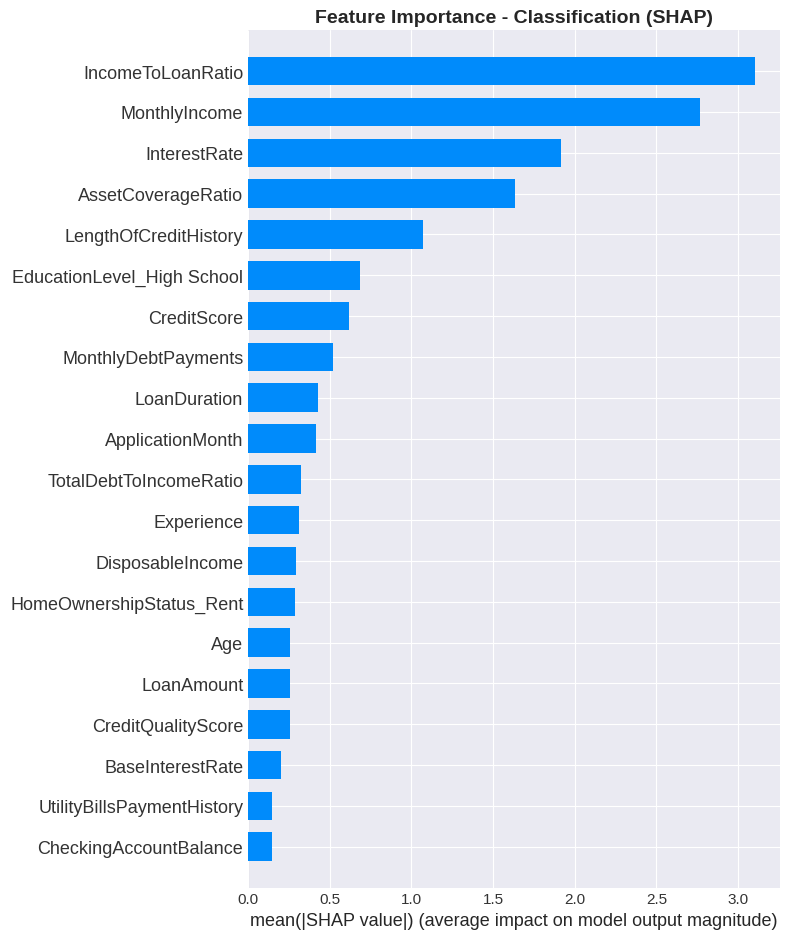

In [99]:
# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_clf, X_test_clf_selected, plot_type="bar", show=False)
plt.title('Feature Importance - Classification (SHAP)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

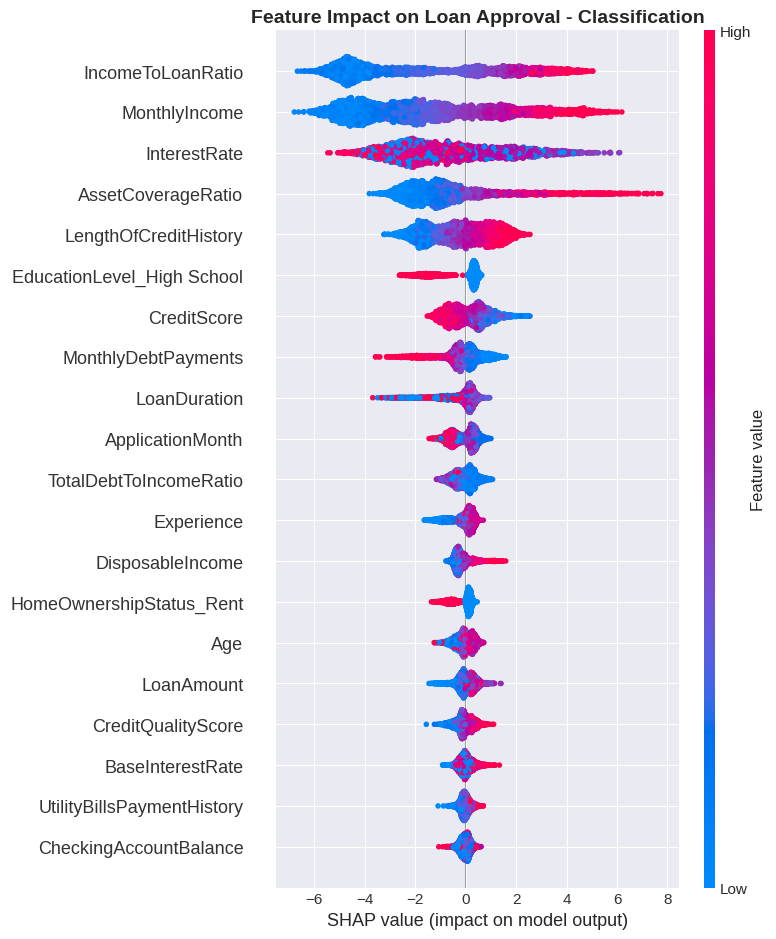

In [100]:
# Detailed summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_clf, X_test_clf_selected, show=False)
plt.title('Feature Impact on Loan Approval - Classification', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##SHAP Analysis for Regression Model

In [101]:
# Create SHAP explainer for regression
explainer_reg = shap.TreeExplainer(final_reg_model)
shap_values_reg = explainer_reg.shap_values(X_test_reg_selected)

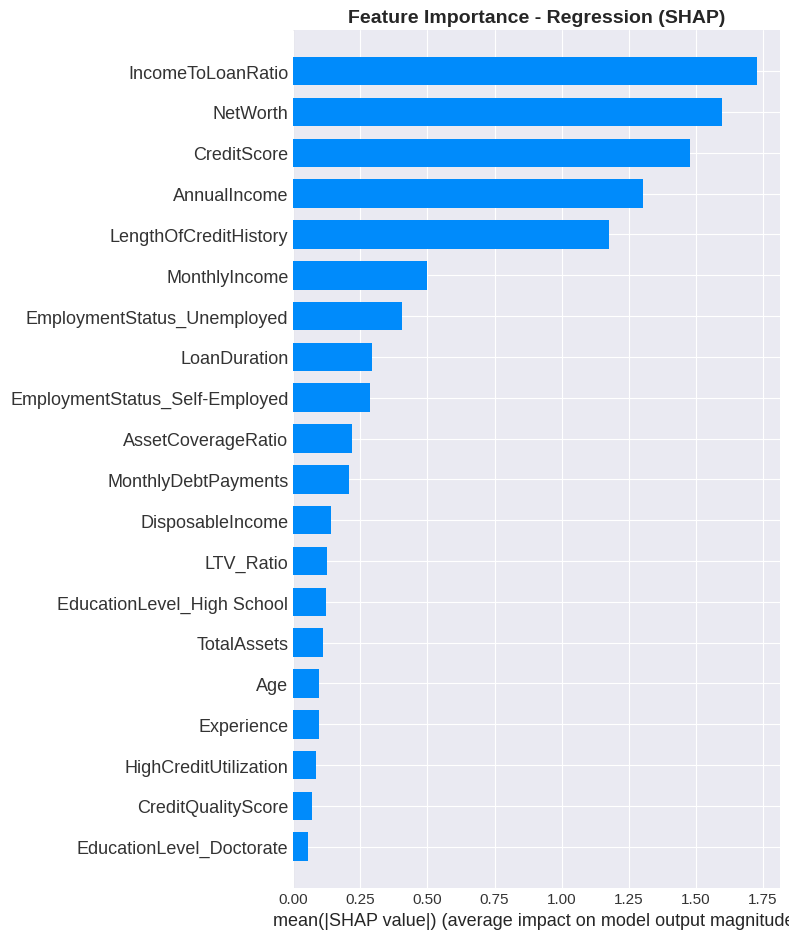

In [102]:
# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_reg, X_test_reg_selected, plot_type="bar", show=False)
plt.title('Feature Importance - Regression (SHAP)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

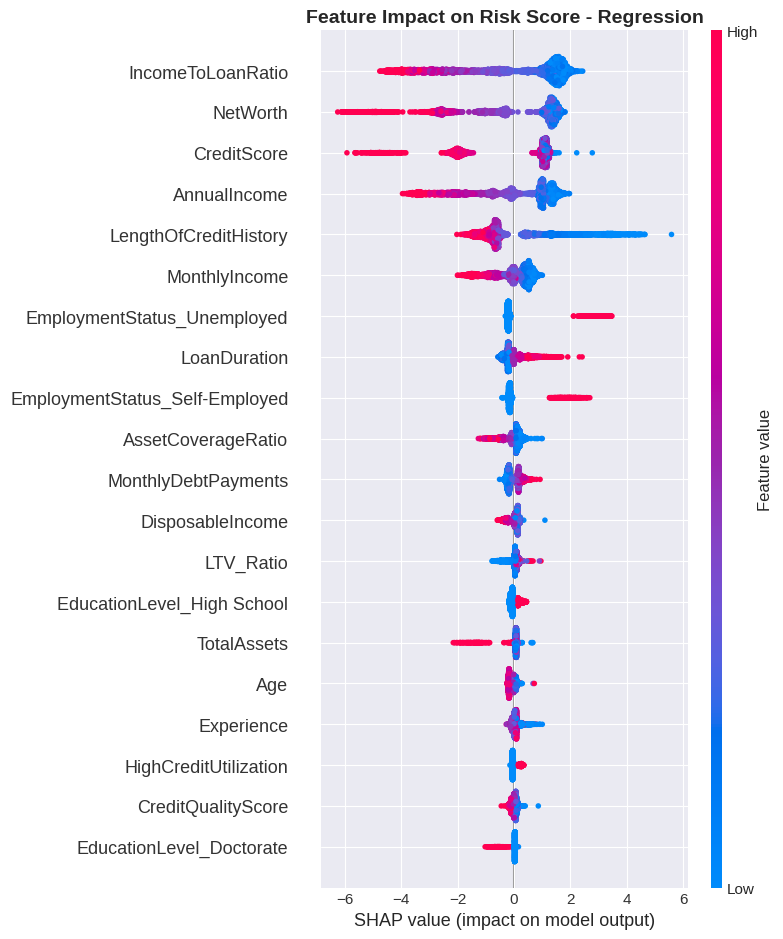

In [103]:
# Detailed summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_reg, X_test_reg_selected, show=False)
plt.title('Feature Impact on Risk Score - Regression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##Get Top Important Features

In [104]:
# Classification feature importance
feature_importance_clf = pd.DataFrame({
    'Feature': X_test_clf_selected.columns,
    'Importance': np.abs(shap_values_clf).mean(axis=0)
}).sort_values('Importance', ascending=False)

In [105]:
feature_importance_clf.head(10).to_string(index=False)

'                   Feature  Importance\n         IncomeToLoanRatio    3.102180\n             MonthlyIncome    2.765368\n              InterestRate    1.913959\n        AssetCoverageRatio    1.631018\n     LengthOfCreditHistory    1.072157\nEducationLevel_High School    0.683377\n               CreditScore    0.615764\n       MonthlyDebtPayments    0.516180\n              LoanDuration    0.424673\n          ApplicationMonth    0.415839'

In [106]:
# Regression feature importance
feature_importance_reg = pd.DataFrame({
    'Feature': X_test_reg_selected.columns,
    'Importance': np.abs(shap_values_reg).mean(axis=0)
}).sort_values('Importance', ascending=False)


In [107]:
feature_importance_reg.head(10).to_string(index=False)

'                       Feature  Importance\n             IncomeToLoanRatio    1.727105\n                      NetWorth    1.596787\n                   CreditScore    1.477240\n                  AnnualIncome    1.304849\n         LengthOfCreditHistory    1.178165\n                 MonthlyIncome    0.498807\n   EmploymentStatus_Unemployed    0.404437\n                  LoanDuration    0.294654\nEmploymentStatus_Self-Employed    0.285861\n            AssetCoverageRatio    0.218906'

#Individual Prediction Examples

In [108]:
def explain_individual_prediction_classification(index, show_plot=True):
    """
    Explain a single classification prediction
    """
    sample = X_test_clf_selected.iloc[index:index+1]
    prediction = final_clf_model.predict(sample)[0]
    probability = final_clf_model.predict_proba(sample)[0]
    actual = y_test_clf.iloc[index]

    print(f"Prediction: {'APPROVED' if prediction == 1 else 'DENIED'}")
    print(f"Actual: {'APPROVED' if actual == 1 else 'DENIED'}")
    print(f"Probability of Approval: {probability[1]:.2%}")
    print(f"Probability of Denial: {probability[0]:.2%}")

    # Get SHAP values for this sample
    shap_value = explainer_clf.shap_values(sample)

    if show_plot:
        plt.figure(figsize=(10, 6))
        shap.waterfall_plot(shap.Explanation(
            values=shap_value[0],
            base_values=explainer_clf.expected_value,
            data=sample.iloc[0],
            feature_names=sample.columns.tolist()
        ), show=False)
        plt.title(f'Why was this loan {"APPROVED" if prediction == 1 else "DENIED"}?',
                  fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # Top contributing features
    feature_contributions = pd.DataFrame({
        'Feature': sample.columns,
        'Value': sample.iloc[0].values,
        'SHAP_Value': shap_value[0]
    }).sort_values('SHAP_Value', key=abs, ascending=False)

    print("\nTop 5 Contributing Features:")
    for idx, row in feature_contributions.head(5).iterrows():
        impact = "INCREASES" if row['SHAP_Value'] > 0 else "DECREASES"
        print(f"  • {row['Feature']}: {row['Value']:.2f} ({impact} approval probability)")

    return prediction, probability

In [109]:
def explain_individual_prediction_regression(index, show_plot=True):
    """
    Explain a single regression prediction
    """
    sample = X_test_reg_selected.iloc[index:index+1]
    prediction = final_reg_model.predict(sample)[0]
    actual = y_test_reg.iloc[index]

    print(f"Predicted Risk Score: {prediction:.2f}")
    print(f"Actual Risk Score: {actual:.2f}")
    print(f"Prediction Error: {abs(prediction - actual):.2f}")

    # Get SHAP values for this sample
    shap_value = explainer_reg.shap_values(sample)

    if show_plot:
        plt.figure(figsize=(10, 6))
        shap.waterfall_plot(shap.Explanation(
            values=shap_value[0],
            base_values=explainer_reg.expected_value,
            data=sample.iloc[0],
            feature_names=sample.columns.tolist()
        ), show=False)
        plt.title(f'Why is the Risk Score {prediction:.2f}?',
                  fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()

    # Top contributing features
    feature_contributions = pd.DataFrame({
        'Feature': sample.columns,
        'Value': sample.iloc[0].values,
        'SHAP_Value': shap_value[0]
    }).sort_values('SHAP_Value', key=abs, ascending=False)

    print("\nTop 5 Contributing Features:")
    for idx, row in feature_contributions.head(5).iterrows():
        impact = "INCREASES" if row['SHAP_Value'] > 0 else "DECREASES"
        print(f"  • {row['Feature']}: {row['Value']:.2f} ({impact} risk score)")

    return prediction

##Example Explanations

In [110]:
# Find examples of approved and denied loans
approved_indices = y_test_clf[y_test_clf == 1].index.tolist()
denied_indices = y_test_clf[y_test_clf == 0].index.tolist()

In [111]:
# Get position in test set
approved_test_idx = [i for i, idx in enumerate(y_test_clf.index) if idx in approved_indices[:5]]
denied_test_idx = [i for i, idx in enumerate(y_test_clf.index) if idx in denied_indices[:5]]

Prediction: APPROVED
Actual: APPROVED
Probability of Approval: 99.03%
Probability of Denial: 0.97%


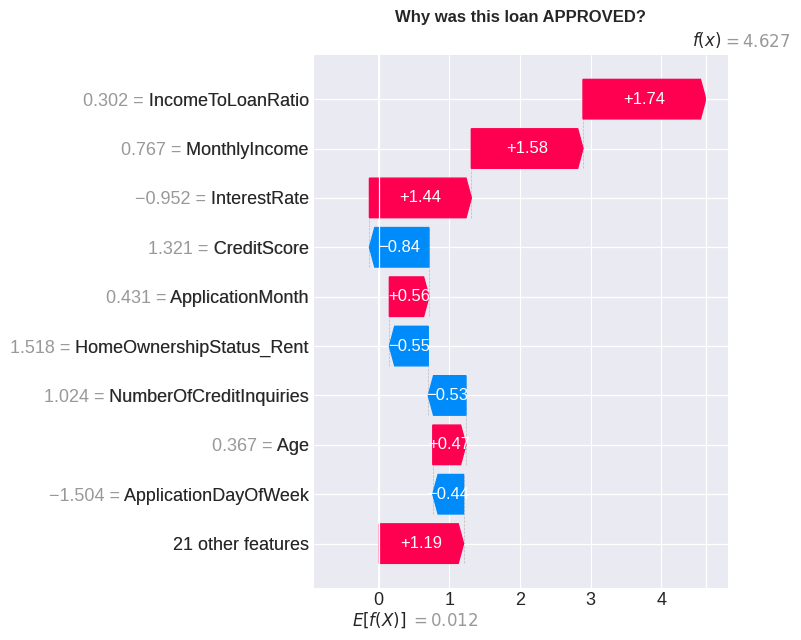


Top 5 Contributing Features:
  • IncomeToLoanRatio: 0.30 (INCREASES approval probability)
  • MonthlyIncome: 0.77 (INCREASES approval probability)
  • InterestRate: -0.95 (INCREASES approval probability)
  • CreditScore: 1.32 (DECREASES approval probability)
  • ApplicationMonth: 0.43 (INCREASES approval probability)


In [113]:
#Example - Approved Loan
if approved_test_idx:
    explain_individual_prediction_classification(approved_test_idx[0], show_plot=True)

Prediction: DENIED
Actual: DENIED
Probability of Approval: 0.00%
Probability of Denial: 100.00%


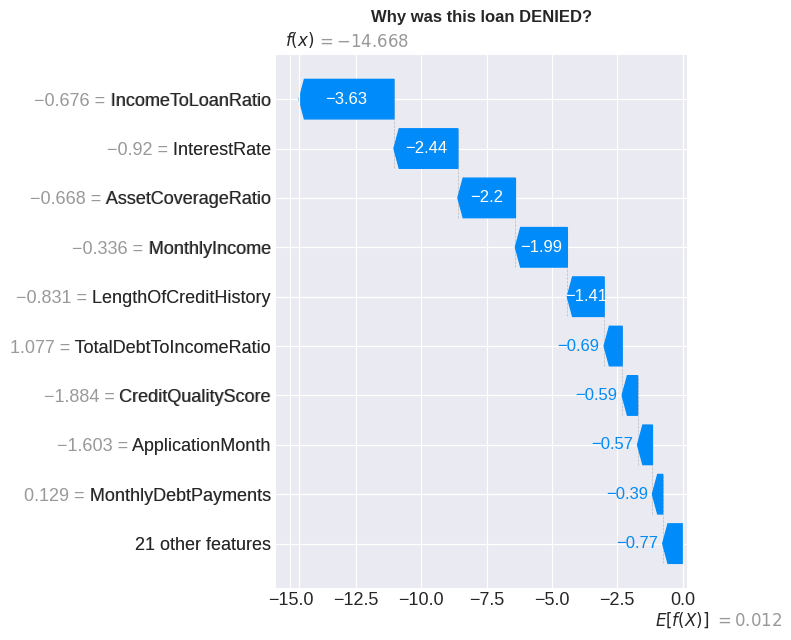


Top 5 Contributing Features:
  • IncomeToLoanRatio: -0.68 (DECREASES approval probability)
  • InterestRate: -0.92 (DECREASES approval probability)
  • AssetCoverageRatio: -0.67 (DECREASES approval probability)
  • MonthlyIncome: -0.34 (DECREASES approval probability)
  • LengthOfCreditHistory: -0.83 (DECREASES approval probability)


In [114]:
#Example - Denied Loan
if denied_test_idx:
    explain_individual_prediction_classification(denied_test_idx[0], show_plot=True)

Predicted Risk Score: 63.24
Actual Risk Score: 84.00
Prediction Error: 20.76


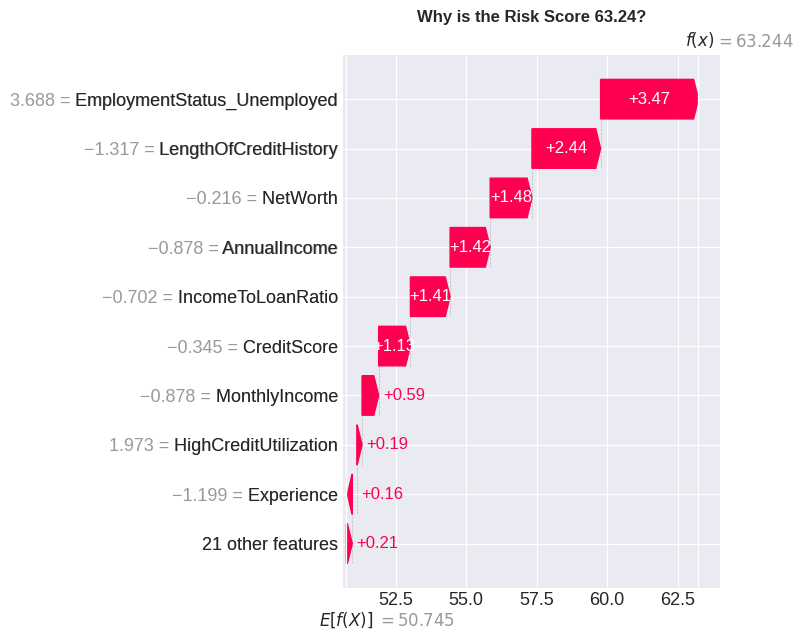


Top 5 Contributing Features:
  • EmploymentStatus_Unemployed: 3.69 (INCREASES risk score)
  • LengthOfCreditHistory: -1.32 (INCREASES risk score)
  • NetWorth: -0.22 (INCREASES risk score)
  • AnnualIncome: -0.88 (INCREASES risk score)
  • IncomeToLoanRatio: -0.70 (INCREASES risk score)


np.float64(63.24388874481098)

In [115]:
#Example - High Risk Score
high_risk_idx = y_test_reg.nlargest(5).index[0]
high_risk_test_idx = y_test_reg.index.get_loc(high_risk_idx)
explain_individual_prediction_regression(high_risk_test_idx, show_plot=True)

#Confusion Matrix and ROC Curve Visualization

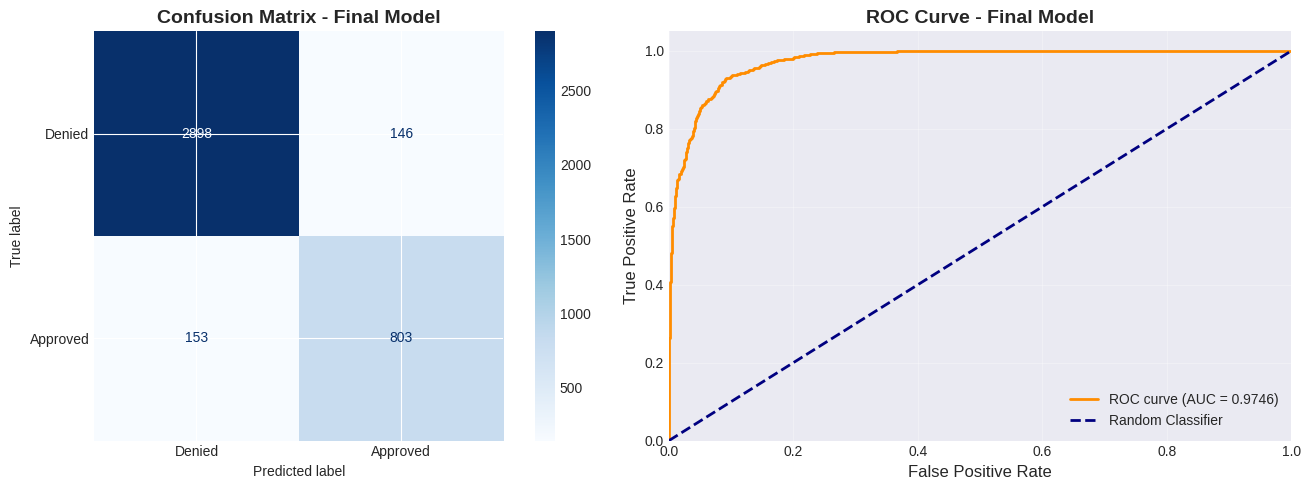

In [117]:
# Confusion Matrix for Classification
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_final_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Denied', 'Approved'])
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix - Final Model', fontsize=14, fontweight='bold')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_clf, y_pred_proba_final_clf)
roc_auc_final = roc_auc_score(y_test_clf, y_pred_proba_final_clf)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_final:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve - Final Model', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#Prediction vs Actual for Regression

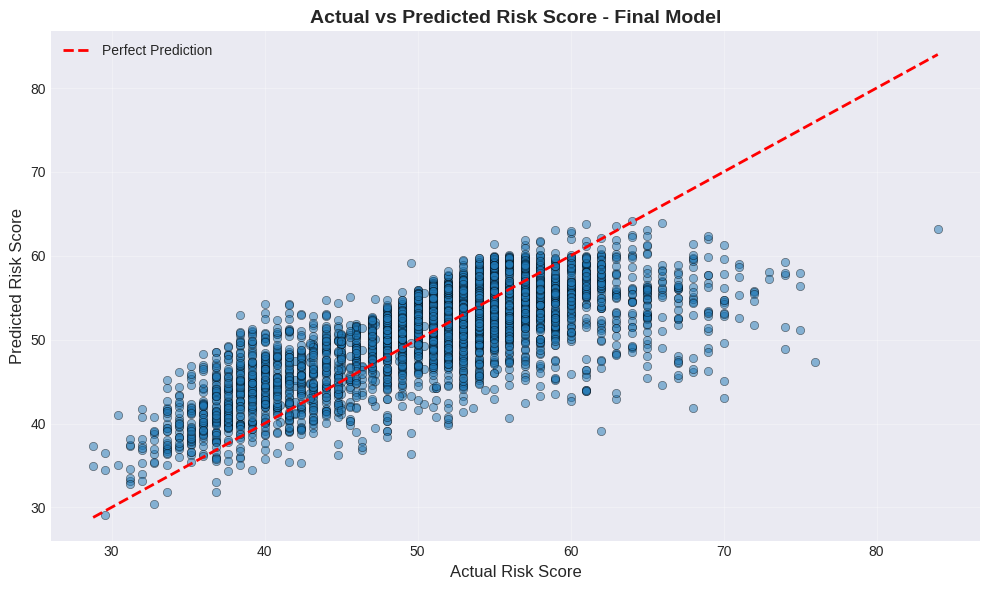

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_final_reg, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Risk Score', fontsize=12)
plt.ylabel('Predicted Risk Score', fontsize=12)
plt.title('Actual vs Predicted Risk Score - Final Model', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

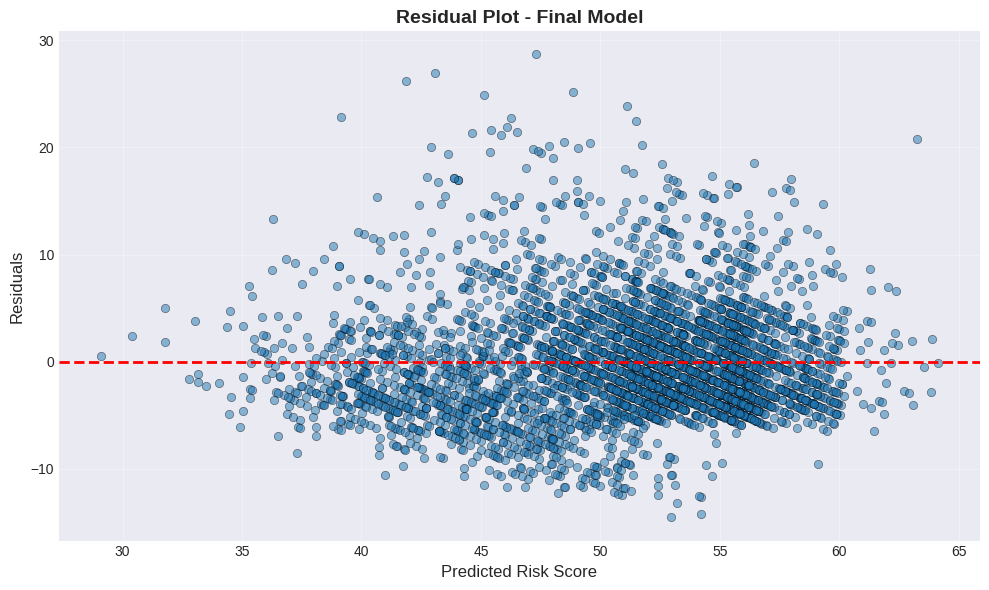

In [119]:
# Residual plot
residuals = y_test_reg - y_pred_final_reg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final_reg, residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Risk Score', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot - Final Model', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()